# Basic data info

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import IPython.display as ipd
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import matplotlib.pyplot as plt
import librosa
import librosa.display

import utils

In [36]:
# Directory where mp3 are stored.
AUDIO_DIR = str(os.environ.get('AUDIO_DIR'))
METADATA_DIR = str(os.environ.get('METADATA_DIR'))
metadata_dir = Path(METADATA_DIR)

# Load metadata and features.
tracks = utils.load(metadata_dir / 'tracks.csv')
genres = utils.load(metadata_dir / 'genres.csv')
features = utils.load(metadata_dir / 'features.csv')
#echonest = utils.load(metadata_dir / 'echonest.csv')

In [57]:
medium = tracks['set', 'subset'] <= 'medium'
genresss = tracks['track', 'genre_top']

In [58]:
genresss

track_id
2         Hip-Hop
3         Hip-Hop
5         Hip-Hop
10            Pop
20            NaN
           ...   
155316       Rock
155317       Rock
155318       Rock
155319       Rock
155320        NaN
Name: (track, genre_top), Length: 106574, dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

In [73]:
tracks_with_index = tracks.reset_index()
tracks_with_index.head(10)

track_id    album                                                          \
           comments        date_created date_released engineer favorites id   
0        2        0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
1        3        0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
2        5        0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3       10        0 2008-11-26 01:45:08    2008-02-06      NaN         4  6   
4       20        0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   
5       26        0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   
6       30        0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   
7       46        0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   
8       48        0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   
9      134        0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   

                                                               ...  \
                                 information listens producer  ...   
0                                    <p></p>    6073      NaN  ...   
1                                    <p></p>    6073      NaN  ...   
2                                    <p></p>    6073      NaN  ...   
3                                        NaN   47632      NaN  ...   
4  <p> "spiritual songs" from Nicky Cook</p>    2710      NaN  ...   
5  <p> "spiritual songs" from Nicky Cook</p>    2710      NaN  ...   
6  <p> "spiritual songs" from Nicky Cook</p>    2710      NaN  ...   
7  <p> "spiritual songs" from Nicky Cook</p>    2710      NaN  ...   
8  <p> "spiritual songs" from Nicky Cook</p>    2710      NaN  ...   
9                                    <p></p>    6073      NaN  ...   

        track                         \
  information interest language_code   
0         NaN     4656            en   
1         NaN     1470            en   
2         NaN     1933            en   
3         NaN    54881            en   
4         NaN      978            en   
5         NaN     1060            en   
6         NaN      718            en   
7         NaN      252            en   
8         NaN      247            en   
9         NaN     1126            en   

                                                                              \
                                             license listens lyricist number   
0  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN      3   
1  Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN      4   
2  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN      6   
3  Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN      1   
4  Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN      3   
5  Attribution-NonCommercial-NoDerivatives (aka M...     193      NaN      4   
6  Attribution-NonCommercial-NoDerivatives (aka M...     612      NaN      5   
7  Attribution-NonCommercial-NoDerivatives (aka M...     171      NaN      8   
8  Attribution-NonCommercial-NoDerivatives (aka M...     173      NaN      9   
9  Attribution-NonCommercial-ShareAlike 3.0 Inter...     943      NaN      5   

                                       
  publisher tags                title  
0       NaN   []                 Food  
1       NaN   []         Electric Ave  
2       NaN   []           This World  
3       NaN   []              Freeway  
4       NaN   []      Spiritual Level  
5       NaN   []  Where is your Love?  
6       NaN   []            Too Happy  
7       NaN   []             Yosemite  
8       NaN   []       Light of Light  
9       NaN   []         Street Music  

[10 rows x 53 columns]

In [79]:
track20 = tracks_with_index.iloc[[4]]

In [80]:
track20

track_id    album                                                          \
           comments        date_created date_released engineer favorites id   
4       20        0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   

                                                               ...  \
                                 information listens producer  ...   
4  <p> "spiritual songs" from Nicky Cook</p>    2710      NaN  ...   

        track                         \
  information interest language_code   
4         NaN      978            en   

                                                                              \
                                             license listens lyricist number   
4  Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN      3   

                                   
  publisher tags            title  
4       NaN   []  Spiritual Level  

[1 rows x 53 columns]

In [3]:
np.testing.assert_array_equal(features.index, tracks.index)
#assert echonest.index.isin(tracks.index).all()

In [4]:
tracks.shape, genres.shape, features.shape, #echonest.shape

((106574, 52), (163, 4), (106574, 518))

Tracks - 106574

Genres - 163

Features - 518


Track Metadata - 52 (set: 2, artist: 17, album: 13, track: 20)

11 types of features

In [5]:
tracks['set'].shape[1], tracks['artist'].shape[1], tracks['album'].shape[1], tracks['track'].shape[1]

(2, 17, 13, 20)

In [6]:
tracks.head(n=1)

album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   

                                            ...       track           \
         information listens producer tags  ... information interest   
track_id                                    ...                        
2            <p></p>    6073      NaN   []  ...         NaN     4656   

                                                                           \
         language_code                                            license   
track_id                                                                    
2                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   

                                                       
         listens lyricist number publisher tags title  
track_id                                               
2           1293      NaN      3       NaN   []  Food  

[1 rows x 52 columns]

In [7]:
tracks['album'].head(n=1)

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album


In [8]:
tracks['set'].head(n=3)

,split,subset
track_id,,
2,training,small
3,training,medium
5,training,small


In [9]:
genres.head(n=3)

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3


In [10]:
features.head(n=3)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   

feature                    zcr                                               \
statistics            kurtosis       max      mean    median  min      skew   
number            06        01        01        01        01   01        01   
track_id                                                                      
2           0.012111  5.758890  0.459473  0.085629  0.071289  0.0  2.089872   
3           0.017740  2.824694  0.466309  0.084578  0.063965  0.0  1.716724   
5           0.014759  6.808415  0.375000  0.053114  0.041504  0.0  2.193303   

feature               
statistics       std  
number            01  
track_id              
2           0.061448  
3           0.069330  
5           0.044861  

[3 rows x 518 columns]

In [11]:
features['chroma_cens']['kurtosis'].head(n=3)

number,01,02,03,04,05,06,07,08,09,10,11,12
track_id,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,1.347792,1.237658
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,1.038253,1.292235
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,0.268932,1.125141


In [12]:
features['chroma_cens','kurtosis'].head(n=3)

number,01,02,03,04,05,06,07,08,09,10,11,12
track_id,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,1.347792,1.237658
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,1.038253,1.292235
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,0.268932,1.125141


In [13]:
#features
#better way is below
max_values = set(feature[0] for feature in features.keys())
max_values

{'chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'mfcc',
 'rmse',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_rolloff',
 'tonnetz',
 'zcr'}

In [14]:
features.columns

MultiIndex([('chroma_cens', 'kurtosis', '01'),
            ('chroma_cens', 'kurtosis', '02'),
            ('chroma_cens', 'kurtosis', '03'),
            ('chroma_cens', 'kurtosis', '04'),
            ('chroma_cens', 'kurtosis', '05'),
            ('chroma_cens', 'kurtosis', '06'),
            ('chroma_cens', 'kurtosis', '07'),
            ('chroma_cens', 'kurtosis', '08'),
            ('chroma_cens', 'kurtosis', '09'),
            ('chroma_cens', 'kurtosis', '10'),
            ...
            (    'tonnetz',      'std', '04'),
            (    'tonnetz',      'std', '05'),
            (    'tonnetz',      'std', '06'),
            (        'zcr', 'kurtosis', '01'),
            (        'zcr',      'max', '01'),
            (        'zcr',     'mean', '01'),
            (        'zcr',   'median', '01'),
            (        'zcr',      'min', '01'),
            (        'zcr',     'skew', '01'),
            (        'zcr',      'std', '01')],
           names=['feature', 'statistics', 

In [15]:
features.columns.levels[0]

Index(['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse',
       'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast',
       'spectral_rolloff', 'tonnetz', 'zcr'],
      dtype='object', name='feature')

In [16]:
features.columns.levels[1]

Index(['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std'], dtype='object', name='statistics')

In [17]:
features.columns.levels[2]

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object', name='number')

In [18]:
list(features.columns.levels[0])

['chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'mfcc',
 'rmse',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_rolloff',
 'tonnetz',
 'zcr']

In [19]:
for feature in features.columns.levels[0]:
    feature_name = str(feature)
    print(f'{feature_name} {features[feature_name]['mean'].columns.shape[0]}')

chroma_cens 12
chroma_cqt 12
chroma_stft 12
mfcc 20
rmse 1
spectral_bandwidth 1
spectral_centroid 1
spectral_contrast 7
spectral_rolloff 1
tonnetz 6
zcr 1


FOR EVERY TRACK: FEATURE -> STATISTIC -> NUMBERs

TIME: 

AMPLITUDE ENVELOPE

ROOT MEAN SQUARE ENERGY

ZERO CROSSING RATE



FREQUENCY:

BAND ENERGY RATIO

SPECTRAL CENTROID

SPECTRAL BANDWIDTH



# Dataset size selection

In [20]:
tracks_small = tracks[tracks['set']['subset'] <= 'small' ]
tracks_small.shape

(8000, 52)

MEDIUM dataset contains entries from SMALL

artist filter applied (they can be only in 1 thing from training/val/test)

In [21]:
tracks_medium = tracks[tracks['set']['subset'] <= 'medium' ]
tracks_medium.shape

(25000, 52)

# Genres

In [22]:
genres.columns

Index(['#tracks', 'parent', 'title', 'top_level'], dtype='object')

In [23]:
top_level_genres = genres['top_level'].unique()

print('{} top-level genres'.format(len(top_level_genres)))
genres.loc[top_level_genres].sort_values('#tracks', ascending=False)

16 top-level genres


,#tracks,parent,title,top_level
genre_id,,,,
38,38154,0,Experimental,38
15,34413,0,Electronic,15
12,32923,0,Rock,12
1235,14938,0,Instrumental,1235
10,13845,0,Pop,10
17,12706,0,Folk,17
21,8389,0,Hip-Hop,21
2,5271,0,International,2
4,4126,0,Jazz,4


In [24]:
small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks[tracks['track', 'genre_top'] == 'Hip-Hop']

genre1.head(2)

track_id
2    False
3    False
Name: (track, genre_top), dtype: bool

In [25]:
genre2.head(2)

album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   

                                            ...       track           \
         information listens producer tags  ... information interest   
track_id                                    ...                        
2            <p></p>    6073      NaN   []  ...         NaN     4656   
3            <p></p>    6073      NaN   []  ...         NaN     1470   

                                                                           \
         language_code                                            license   
track_id                                                                    
2                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
3                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   

                                                               
         listens lyricist number publisher tags         title  
track_id                                                       
2           1293      NaN      3       NaN   []          Food  
3            514      NaN      4       NaN   []  Electric Ave  

[2 rows x 52 columns]

((2000, 2), (2000,))

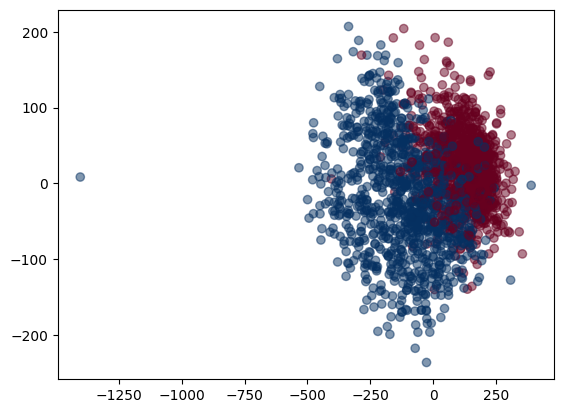

In [26]:
small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks['track', 'genre_top'] == 'Hip-Hop'

X = features.loc[small & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
X.shape, y.shape

# Loading audio files and checking sampling rates

In [27]:
filename = utils.get_audio_path(AUDIO_DIR, 2)
print(f'File: {filename}')

File: ..\..\fma\fma_small\000\000002.mp3


In [28]:
x, sr = librosa.load(filename, sr=None, mono=True)
x.shape, sr

((1321967,), 44100)

In [29]:
librosa.get_samplerate(filename)

44100

In [30]:
del tracks

Not every track has 44100 sample rate.

Errors in SMALL dataset: 99134, 108925, 133297    have literally 0 length

In [31]:
# track_ids = list(tracks_small.index)

# for i, track_id in enumerate(track_ids):
#     try:
#         librosa.get_samplerate(utils.get_audio_path(AUDIO_DIR, track_id))
#     except:
#         print(f'Error with track id: {track_id} at index {i}') 

Other sampling rates (not 44100) are loaded correctly BUT ONLY WITH sr=None.

With no sr=None, the shape is also different.

In [32]:
filename_other_sampling_rate = utils.get_audio_path(AUDIO_DIR, 91868)
x_othersr, sr_othersr = librosa.load(filename_other_sampling_rate, sr=None, mono=True)
x_othersr.shape, sr_othersr

((1439471,), 48000)

Checking tracks 98565, 98567, 98569 which are short but not 0.

Conclusion: They can not be loaded.

In [33]:
filename_short_length = utils.get_audio_path(AUDIO_DIR, 98569)
filename_short_length

WindowsPath('../../fma/fma_small/098/098569.mp3')

In [34]:
# Throws error (interestingly, librosa.get_samplerate does not throw error)
# x_short, sr_short = librosa.load(filename_short_length, sr=None, mono=True)
# x_short.shape, sr_short

Conclusion:

3 tracks with 0 length (99134, 108925, 133297) can not be checked for sampling rate (get_samplerate) nor loaded.

3 tracks with glitched shorter length (98565, 98567, 98569) can be checked for sampling rate but can not be loaded.

Loading a track with no sr=None results in other x shape, because it is in that case loaded at 22050 sampling rate. 

Two tracks with the same sampling rate can have different sample counts despite same length.

USE sr=None to apply the sampling rate the file actually is in.

In [35]:
#track that has sr=44100
filename_shapetest = utils.get_audio_path(AUDIO_DIR, 5)

x_shapetest, sr_shapetest = librosa.load(filename_shapetest, sr=None, mono=True)
x_shapetest.shape, sr_shapetest

((1323119,), 44100)

# Stereo

In [36]:
x_stereotest, sr_stereotest = librosa.load(filename_shapetest, sr=None, mono=False)
x_stereotest.shape, sr_stereotest

((2, 1323119), 44100)

CONCLUSION: Samples are averaged.

In [37]:
x_shapetest[1000:1010]

array([0.01206548, 0.00894138, 0.00603793, 0.0046303 , 0.00575878,
       0.00752645, 0.00849256, 0.00952517, 0.01104724, 0.01224462],
      dtype=float32)

In [38]:
x_stereotest[0, 1000:1010]

array([0.0118293 , 0.00874311, 0.00573715, 0.00424854, 0.00526333,
       0.00685344, 0.00783548, 0.0090715 , 0.01063305, 0.01169413],
      dtype=float32)

In [39]:
x_stereotest[1, 1000:1010]

array([0.01230167, 0.00913965, 0.00633871, 0.00501206, 0.00625423,
       0.00819947, 0.00914963, 0.00997885, 0.01146143, 0.01279511],
      dtype=float32)

# Removing problematic tracks

In [40]:
faulty_track_ids = [99134, 108925, 133297, 98565, 98567, 98569]
tracks_small.drop(labels=faulty_track_ids, inplace=True)

In [41]:
tracks_small.shape

(7994, 52)

# Get top genre of track

SMALL and MEDIUM datasets can only have tracks with ONE top level genre.

They can have multiple 'genre' and 'genre_all' though.

In [42]:
#10 - track_id
top_genre = tracks_small['track', 'genre_top'][10]
top_genre

'Pop'

['track', 'genre_top', 10] was not equivalent to above.

# Audio duration

In [44]:
filename_visual = utils.get_audio_path(AUDIO_DIR, 5)
x_visual, sr_visual = librosa.load(filename_visual, sr=None, mono=True)

In [50]:
print(f'Amount of samples: {x_visual.shape[0]}')

Amount of samples: 1323119


In [60]:
duration = librosa.get_duration(y=x_visual, sr=sr_visual) 
print(f'Duration: {duration}s ({duration:0.3f}s)')

Duration: 30.00269841269841s (30.003s)


In [65]:
calculated_duration = (1 / sr_visual) * x_visual.shape[0]
calculated_duration

30.002698412698415

Librosa time implementation matches calculation

# Audio play

In [78]:
sample_duration = 1 / sr_visual
print(f'{sample_duration:0.6f}s per sample for sr={sr_visual}')

0.000023s per sample for sr=44100


Play 0-5 seconds of 30s audio file

In [79]:
seconds_of_excerpt = 5
end_sample_of_excerpt = int(5 / sample_duration)
end_sample_of_excerpt

In [97]:
zero_to_five_excerpt = x_visual[:end_sample_of_excerpt]
zero_to_five_excerpt.shape

(220500,)

Bigger rate creates nightcore.

In [106]:
ipd.Audio(data=zero_to_five_excerpt, rate=sr_visual)

In [96]:
duration_excerpt = librosa.get_duration(y=zero_to_five_excerpt, sr=sr_visual) 
duration_excerpt

5.0

Play 14-20 seconds of 30s audio track

In [108]:
beginning_sample = int (14 / sample_duration)
end_sample = beginning_sample + int (6 / sample_duration)

fourteen_to_twenty_excerpt = x_visual[beginning_sample:end_sample]

ipd.Audio(data=fourteen_to_twenty_excerpt, rate=sr_visual)

In [102]:
duration_excerpt2 = librosa.get_duration(y=fourteen_to_twenty_excerpt, sr=sr_visual) 
print(f'{duration_excerpt2}s')

6.0s
